# Movie Recommendation System

Types of Recommendation System
1. Content Based
2. Collaborative Filtering
    a. Memory Based
        i. user-based
        ii. item-based
    b. Model Based

### Content Based RS

In [49]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
cols = 'user_id item_id rating timestamp'.split()

In [7]:
df = pd.read_csv('u.data',sep='\t',names=cols)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [40]:
df['user_id'].nunique()

944

In [8]:
df.sample(5)

,user_id,item_id,rating,timestamp
43561,495,435,5,888632969
32327,378,1042,3,880056287
36655,297,151,3,875239975
15628,95,747,5,880573288
34108,381,529,5,892696060


In [17]:
cols_movies = ['item_id', 'title']+[str(i) for i in range(22)]
movie_titles = pd.read_csv('u.item',sep='|', names = cols_movies)
movie_titles.head()

,item_id,title,0,1,2,3,4,5,6,7,...,12,13,14,15,16,17,18,19,20,21
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
movie_titles = movie_titles[['item_id','title']]
movie_titles.sample(5)

,item_id,title
378,379,Tales From the Crypt Presents: Demon Knight (1...
8,9,Dead Man Walking (1995)
1412,1413,Street Fighter (1994)
1054,1055,"Simple Twist of Fate, A (1994)"
1337,1338,Two Deaths (1995)


In [12]:
# Merging or Concatenating or Joining
# pd.merge
# pd.concat
# df.join

In [13]:
movie_titles.shape

(1682, 24)

In [14]:
df.shape

(100003, 4)

In [22]:
data = pd.merge(df,movie_titles, on='item_id')
data.sample(10)

,user_id,item_id,rating,timestamp,title
6253,798,98,1,875639581,"Silence of the Lambs, The (1991)"
63989,344,269,4,884814359,"Full Monty, The (1997)"
48487,43,531,4,883955160,Shine (1996)
48086,493,238,3,884131985,Raising Arizona (1987)
95003,486,936,3,879874629,Brassed Off (1996)
67435,933,53,1,874855104,Natural Born Killers (1994)
79613,543,578,3,877546305,Demolition Man (1993)
22586,454,419,4,881959917,Mary Poppins (1964)
26070,541,79,5,883871524,"Fugitive, The (1993)"
54433,568,611,3,877907782,Laura (1944)


#### Exploratory Data Analysis (EDA)

In [24]:
data['title'].value_counts().head(20)

Star Wars (1977)                    584
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     368
Star Trek: First Contact (1996)     365
Name: title, dtype: int64

In [33]:
data['title'].value_counts().tail(20)

Stefano Quantestorie (1993)                      1
Very Natural Thing, A (1974)                     1
Object of My Affection, The (1998)               1
You So Crazy (1994)                              1
King of New York (1990)                          1
Mostro, Il (1994)                                1
Power 98 (1995)                                  1
Hedd Wyn (1992)                                  1
Jupiter's Wife (1994)                            1
Good Morning (1971)                              1
Ripe (1996)                                      1
Shadow of Angels (Schatten der Engel) (1976)     1
I, Worst of All (Yo, la peor de todas) (1990)    1
Great Day in Harlem, A (1994)                    1
Lotto Land (1995)                                1
Three Lives and Only One Death (1996)            1
Mille bolle blu (1993)                           1
Man from Down Under, The (1943)                  1
Getting Away With Murder (1996)                  1
August (1996)                  

In [25]:
df['rating'].mean()

3.5298641040768777

In [27]:
for i in data['title'].unique():
    print(i, data['rating'][data['title']==i].mean(), sep='\t\t')

Star Wars (1977)		4.359589041095891
Empire Strikes Back, The (1980)		4.206521739130435
Gone with the Wind (1939)		3.854651162790698
Kolya (1996)		3.9914529914529915
L.A. Confidential (1997)		4.161616161616162
Heavyweights (1994)		2.1538461538461537
Legends of the Fall (1994)		3.45679012345679
Jackie Brown (1997)		3.642857142857143
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)		4.252577319587629
Hunt for Red October, The (1990)		3.8634361233480177
Jungle Book, The (1994)		3.5647058823529414
Grease (1978)		3.347058823529412
Remains of the Day, The (1993)		3.94
Men in Black (1997)		3.745874587458746
Romy and Michele's High School Reunion (1997)		3.061224489795918
Star Trek: First Contact (1996)		3.66027397260274
To Wong Foo, Thanks for Everything! Julie Newmar (1995)		2.8947368421052633
Batman Forever (1995)		2.6666666666666665
Only You (1994)		3.1538461538461537
Age of Innocence, The (1993)		3.3846153846153846
Sabrina (1995)		3.5
Just Cause (1995)		3.1428571

In [32]:
# Groupby
data.groupby('title')['rating'].mean().sort_values(ascending = False).head(20)

title
They Made Me a Criminal (1939)                            5.000000
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Saint of Fort Washington, The (1993)                      5.000000
Someone Else's America (1995)                             5.000000
Star Kid (1997)                                           5.000000
Great Day in Harlem, A (1994)                             5.000000
Aiqing wansui (1994)                                      5.000000
Santa with Muscles (1996)                                 5.000000
Prefontaine (1997)                                        5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Pather Panchali (1955)                                    4.625000
Some Mother's Son (1996)                                  4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Anna (1996)                                               4.500000
Everest (1998)                                          

In [34]:
rating = pd.DataFrame(data.groupby('title')['rating'].mean())
rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [35]:
rating['count'] = data['title'].value_counts()
rating.head()

,rating,count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [36]:
sum(rating['count']<10)

520

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Frequency-->')

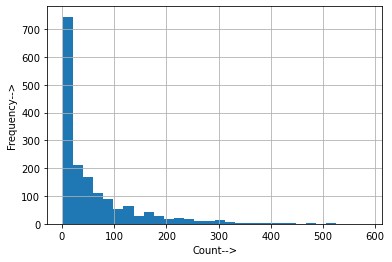

In [73]:
rating['count'].hist(bins=30)
plt.xlabel('Count-->')
plt.ylabel('Frequency-->')

In [43]:
pivot_df = data.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
pivot_df.head(20)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
rating.sort_values('count', ascending = False).head(20)

,rating,count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [46]:
sw_ratings = pivot_df['Star Wars (1977)']

In [47]:
sw_ratings

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

##### Finding Correlation

<img src ="https://www.gstatic.com/education/formulas2/355397047/en/correlation_coefficient_formula.svg">

In [68]:
pivot_df['1-900 (1994)'].mean()

2.6

In [50]:
similarity_sw = pivot_df.corrwith(sw_ratings)

In [51]:
similarity_sw

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
� k�ldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [52]:
corr_df = pd.DataFrame(similarity_sw, columns = ['Correlation'])

In [56]:
corr_df.dropna(inplace=True)

In [57]:
corr_df.sort_values('Correlation')

,Correlation
title,
Frankie Starlight (1995),-1.0
Roseanna's Grave (For Roseanna) (1997),-1.0
Two Deaths (1995),-1.0
I Like It Like That (1994),-1.0
Theodore Rex (1995),-1.0
...,...
Cosi (1996),1.0
Commandments (1997),1.0
Hollow Reed (1996),1.0


In [60]:
corr_df = corr_df.join(rating['count'])
corr_df.head()

,Correlation,count
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [64]:
corr_df[corr_df['count']>200].sort_values(by='Correlation',ascending=False).head(30)

,Correlation,count
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
L.A. Confidential (1997),0.319065,297
E.T. the Extra-Terrestrial (1982),0.303619,300
Batman (1989),0.289344,201


In [65]:
ter_ratings = pivot_df['Terminator 2: Judgment Day (1991)']
similarity_ter = pivot_df.corrwith(ter_ratings)
corr_df_ter = pd.DataFrame(similarity_ter, columns = ['Correlation'])
corr_df_ter.dropna(inplace=True)
corr_df_ter = corr_df_ter.join(rating['count'])
corr_df_ter[corr_df_ter['count']>200].sort_values(by='Correlation',ascending=False).head(3)

,Correlation,count
title,,
Terminator 2: Judgment Day (1991),1.000000,295
"Terminator, The (1984)",0.562853,301
True Lies (1994),0.516728,208


In [72]:
corr_df_ter[(corr_df_ter['count']>200)&(corr_df_ter['Correlation']>0.55)].sort_values(by='Correlation',ascending=False)

,Correlation,count
title,,
Terminator 2: Judgment Day (1991),1.000000,295
"Terminator, The (1984)",0.562853,301
